# CSP Project


## This dashboard will analyze pitching mechanics and efficiency from raw biomechanical force plate and pitching data.

In [23]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, f_oneway
import statsmodels.api as sm


#### Strides and Efficiency

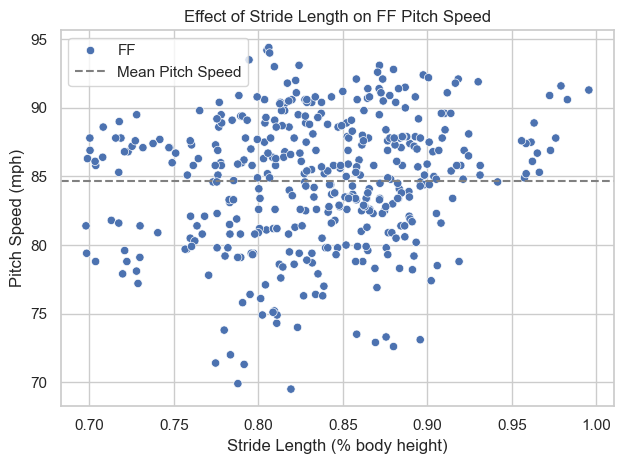

In [52]:
# Load in data
data = pd.read_csv("C:/Users/Katrina Peralta/Downloads/poi_metrics (1) (1).csv")

# Define key variables
stride = 'stride_length'
velocity = 'pitch_speed_mph'

# Filter data and replace NAs or Os
filtered_data = data.dropna(subset=[velocity])

# Plot stride length vs pitching efficiency
sns.scatterplot(data=filtered_data, x=stride, y=velocity, hue='pitch_type')
plt.title('Effect of Stride Length on FF Pitch Speed')
plt.xlabel(f'Stride Length (% body height)')
plt.ylabel('Pitch Speed (mph)')
plt.axhline(filtered_data[velocity].mean(), linestyle='--', color='gray', label='Mean Pitch Speed')
plt.legend()
plt.tight_layout()
plt.show()


Correlation: r = 0.16, p_value = 0.0014


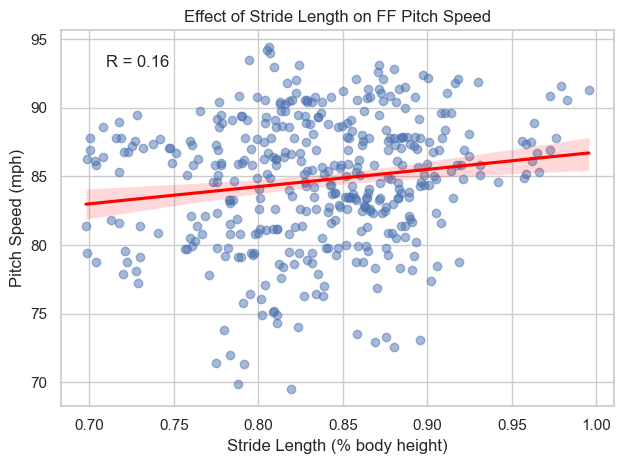

In [48]:
# Calculate Pearson correlation coefficient
r, p_value = pearsonr(filtered_data[stride], filtered_data[velocity])
print(f'Correlation: r = {r:.2f}, p_value = {p_value:.4f}')

sns.regplot(data=filtered_data, x=stride, y=velocity, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Effect of Stride Length on FF Pitch Speed')
plt.xlabel(f'Stride Length (% body height)')
plt.ylabel('Pitch Speed (mph)')
plt.text(0.71, 93, f'R = {r:.2f}')
plt.tight_layout()
plt.show()


#### There is a statistical relationship between stride length and pitch speed but it is weak. The r value of 0.16 suggests a weak positive linear relationship between the two and a p value of 0.0014 is statistically significant because it is less than 0.05. Other parameters that influence ball velocity should be considered such as the entire kinetic chain during a pitch.

#### Does stride length affect key kinematic outputs (pelvis, shoulder velo, etc.) and joint torques (shoulder, elbow) in an FF pitch?

C:\Temp\ipykernel_53296\3131148658.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stride Length Group', y=y, data=data, palette='muted')


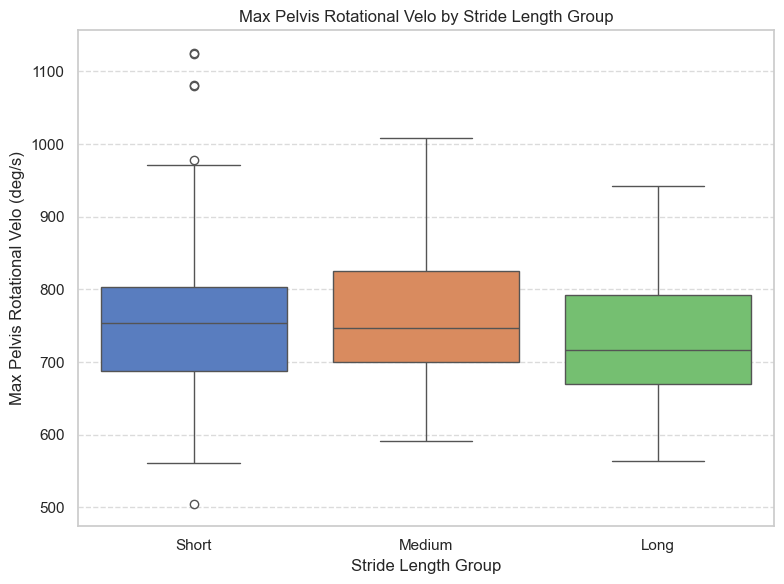

C:\Temp\ipykernel_53296\3131148658.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stride Length Group', y=y, data=data, palette='muted')


Max Pelvis Rotational Velo (deg/s):
F-statistic = 4.008
p-value = 0.0189
Since the p-value is less than 0.05, there is a significant difference between stride length groups.



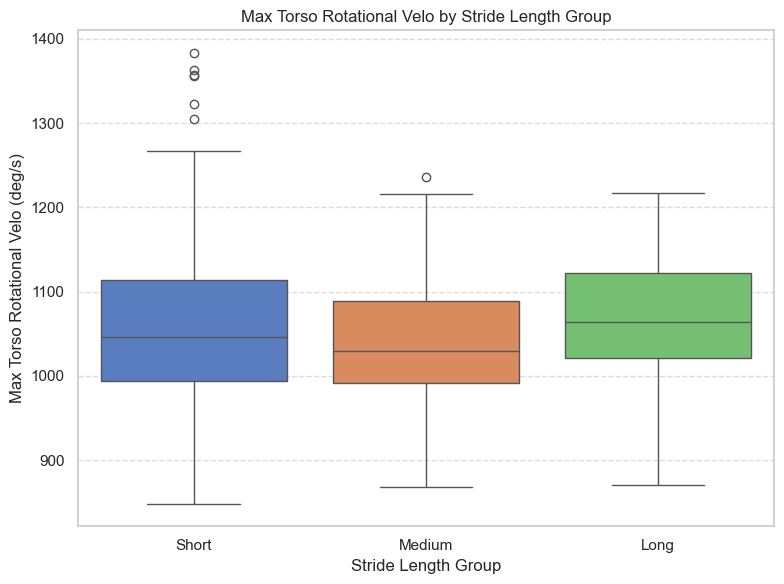

Max Torso Rotational Velo (deg/s):
F-statistic = 3.387
p-value = 0.0348
Since the p-value is less than 0.05, there is a significant difference between stride length groups.



C:\Temp\ipykernel_53296\3131148658.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stride Length Group', y=y, data=data, palette='muted')


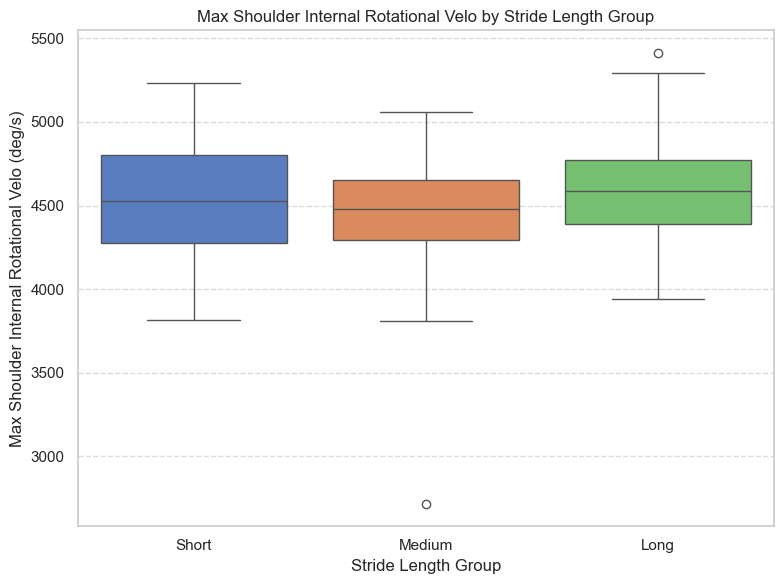

Max Shoulder Internal Rotational Velo (deg/s):
F-statistic = 5.457
p-value = 0.0046
Since the p-value is less than 0.05, there is a significant difference between stride length groups.



C:\Temp\ipykernel_53296\3131148658.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stride Length Group', y=y, data=data, palette='muted')


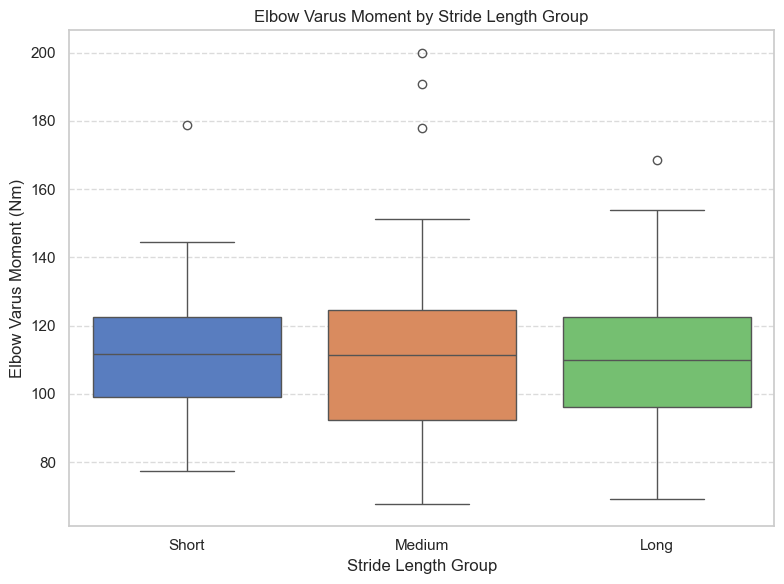

Elbow Varus Moment (Nm):
F-statistic = 0.017
p-value = 0.9833
Since the p-value is above 0.05, there is no significant different between groups.



C:\Temp\ipykernel_53296\3131148658.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stride Length Group', y=y, data=data, palette='muted')


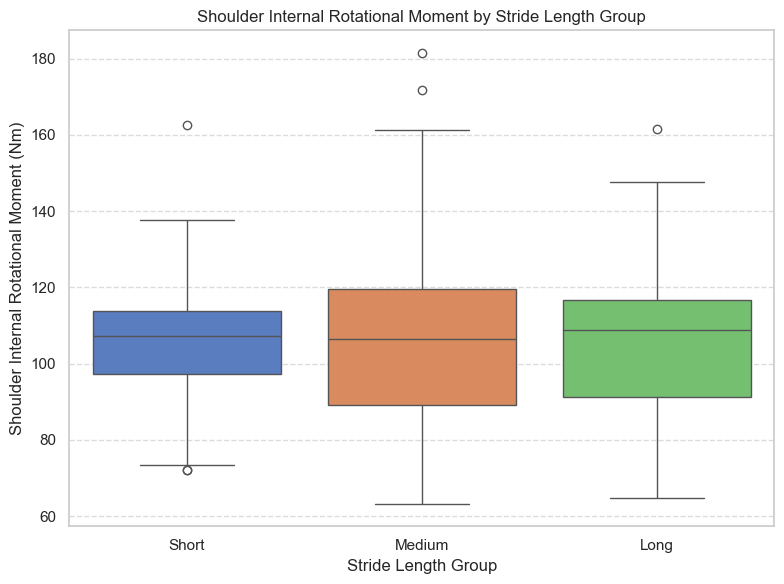

Shoulder Internal Rotational Moment (Nm):
F-statistic = 0.100
p-value = 0.9050
Since the p-value is above 0.05, there is no significant different between groups.



C:\Temp\ipykernel_53296\3131148658.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stride Length Group', y=y, data=data, palette='muted')


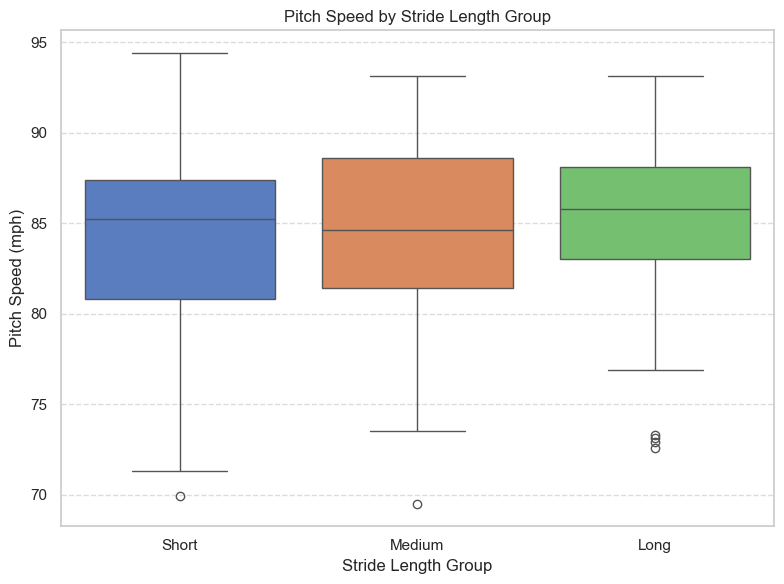

Pitch Speed (mph):
F-statistic = 3.857
p-value = 0.0219
Since the p-value is less than 0.05, there is a significant difference between stride length groups.



In [36]:
# Filter out relevant columns
variables = [
    'pitch_speed_mph', 'stride_length', 'max_pelvis_rotational_velo', 'max_torso_rotational_velo',
    'max_shoulder_internal_rotational_velo', 'max_elbow_extension_velo', 'elbow_varus_moment', 'shoulder_internal_rotation_moment'
]

# Remove NaNs 
data = data.dropna(subset=variables)

# Separate sections based off stride length
data['Stride Length Group'] = pd.qcut(data['stride_length'], q=3, labels=['Short', 'Medium', 'Long'])

# Set up box plots
def plot_boxplot(data, y, title, ylabel):
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Stride Length Group', y=y, data=data, palette='muted')
    plt.title(title)
    plt.xlabel('Stride Length Group')
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Variables to plot
plot_vars = [
    ('max_pelvis_rotational_velo', 'Max Pelvis Rotational Velo by Stride Length Group', 'Max Pelvis Rotational Velo (deg/s)'),
    ('max_torso_rotational_velo', 'Max Torso Rotational Velo by Stride Length Group', 'Max Torso Rotational Velo (deg/s)'),
    ('max_shoulder_internal_rotational_velo', 'Max Shoulder Internal Rotational Velo by Stride Length Group', 'Max Shoulder Internal Rotational Velo (deg/s)'),
    ('elbow_varus_moment', 'Elbow Varus Moment by Stride Length Group', 'Elbow Varus Moment (Nm)'),
    ('shoulder_internal_rotation_moment', 'Shoulder Internal Rotational Moment by Stride Length Group', 'Shoulder Internal Rotational Moment (Nm)'),
    ('pitch_speed_mph', 'Pitch Speed by Stride Length Group', 'Pitch Speed (mph)'),

]

# Generate all box plots with function
for y, title, ylabel in plot_vars:
    plot_boxplot(data, y, title, ylabel)

    # Split into stride groups
    short = data[data['Stride Length Group'] == 'Short'][y]
    medium = data[data['Stride Length Group'] == 'Medium'][y]
    long = data[data['Stride Length Group'] == 'Long'][y]

    # Run ANOVA to test for significance
    f_stat, p_val = f_oneway(short, medium, long)

    print(f'{ylabel}:')
    print(f'F-statistic = {f_stat:.3f}')
    print(f'p-value = {p_val:.4f}')

    if p_val < 0.05:
        print('Since the p-value is less than 0.05, there is a significant difference between stride length groups.\n')
    else:
        print('Since the p-value is above 0.05, there is no significant different between groups.\n')